Importing the Dependencies

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.math import confusion_matrix

In [230]:
# Loading the dataset to a Pandas Data Frame
credit_card_data = pd.read_csv('/content/sample_data/creditcard.csv')

**Data Analyzing**

In [231]:
# Show first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [232]:
# Show last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [233]:
#(Row ,Column)
credit_card_data.shape

(284807, 31)

In [234]:
#To display  column names of the dataset
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [235]:
# Display the Information of the data set
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: ylabel='Frequency'>

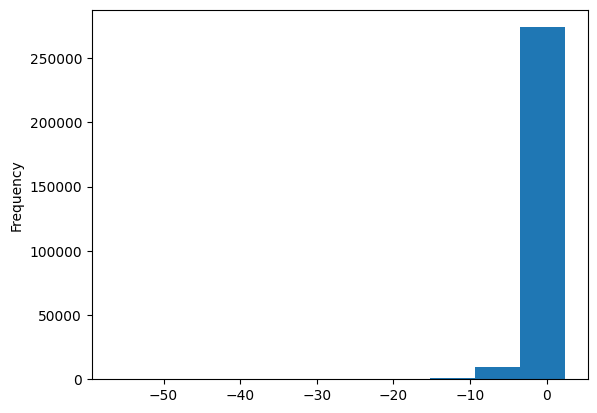

In [236]:
# Displaying a histogram of the 'V1' column in the 'credit_card_data' DataFrame
credit_card_data['V1'].plot(kind='hist')

<Axes: ylabel='Frequency'>

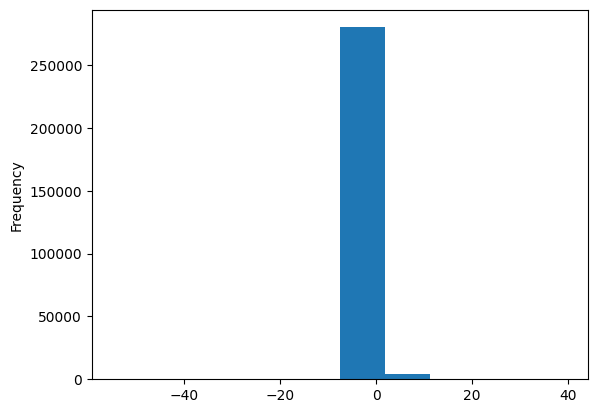

In [237]:
# Displaying a histogram of the 'V20' column in the 'credit_card_data' DataFrame
credit_card_data['V20'].plot(kind='hist')

<Axes: ylabel='Frequency'>

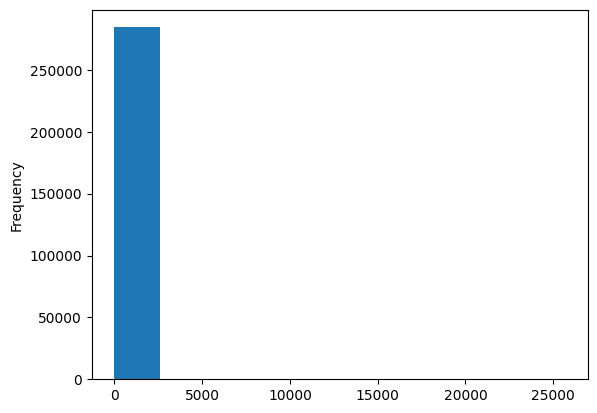

In [238]:
# Displaying a histogram of the 'Amount' column in the 'credit_card_data' DataFrame
credit_card_data['Amount'].plot(kind='hist')

<Axes: xlabel='Class', ylabel='count'>

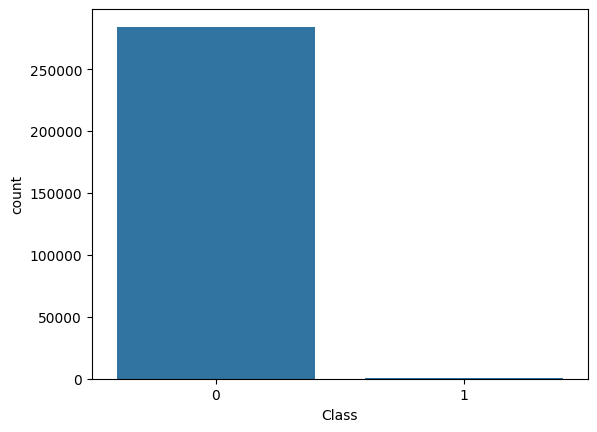

In [239]:
sns.countplot(x='Class',data=credit_card_data)

In [240]:
# Checking the number of missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [241]:
# Dropping the missing values
# because least number of missing vlaues such as count is 1
credit_card_data = credit_card_data.dropna()

In [242]:
# Re-Checking the number of missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

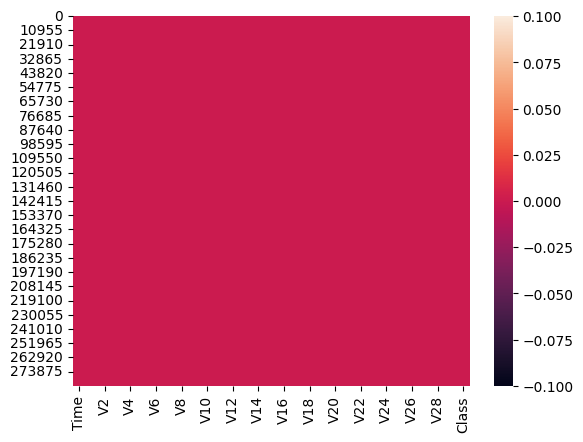

In [243]:
 # After removing the missing values check the missing values using heatmap
sns.heatmap(data = credit_card_data.isnull())

In [244]:
# Change the data type of the Class attribute float to int
credit_card_data['Class'] = credit_card_data['Class'].astype(int)

In [245]:
# Distribution of legit and fraudulent transaction
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is highly unblanced

0 --> Normal Transaction <br>
1 --> Fraudulent Transaction

In [246]:
# Seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [247]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [248]:
# Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [249]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [250]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling<br>
Build a sample dataset containing similar distribution of Normal(Legit) Transactions and Fradulent Transactions<br>

Number of Fradulent Transactions --> 382

In [251]:
legit_sample = legit.sample(n=382)

Concatenating two DataFrame

In [252]:
new_credit_dataset = pd.concat([legit_sample, fraud], axis=0) # axis 0 means data added row by row, 1 means data added column wise


In [253]:
new_credit_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
34346,37623.0,0.782193,-1.362032,0.241949,-0.209407,-1.624684,-1.314955,0.036367,-0.354156,-0.941393,...,-0.377274,-1.327232,-0.003835,0.919323,-0.129062,0.752786,-0.117710,0.067219,306.00,0
45361,42307.0,-2.008808,1.656743,0.064328,0.892513,0.216173,0.153899,0.835589,-0.007272,-0.323784,...,0.027913,0.152914,-0.354223,-0.407747,-0.048271,-0.378309,-1.605844,-0.707728,65.73,0
265570,161944.0,2.179891,-0.669792,-1.361875,-0.993685,-0.502212,-1.222952,-0.279008,-0.260790,-0.849872,...,0.102943,0.191038,0.231564,-0.003610,-0.146214,-0.331375,-0.052747,-0.074123,10.00,0
6750,8482.0,1.021538,-0.722876,2.167144,0.996961,-1.875991,0.282201,-1.348608,0.188065,3.229945,...,-0.061887,0.512518,-0.095070,0.809069,0.227212,1.186301,-0.011386,0.027512,58.30,0
136637,81802.0,-1.223502,-0.146311,1.277698,0.888429,1.180535,0.070567,0.027666,0.110419,-0.682363,...,0.315987,0.778502,-0.213027,-0.793273,0.108248,-0.146919,-0.039631,0.316985,67.45,0


In [254]:
new_credit_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [255]:
new_credit_dataset['Class'].value_counts()

Class
1    492
0    382
Name: count, dtype: int64

In [256]:
new_credit_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95125.437173,-0.076402,0.054490,-0.021356,0.070210,-0.010962,-0.041209,0.109684,0.016695,-0.052739,...,0.033509,0.014450,-0.048670,0.029176,0.034873,-0.002399,0.001156,-0.017288,-0.030130,95.868639
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [257]:
X = new_credit_dataset.drop(columns='Class', axis=1)
Y = new_credit_dataset['Class']

In [258]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
34346    37623.0  0.782193 -1.362032  0.241949 -0.209407 -1.624684 -1.314955   
45361    42307.0 -2.008808  1.656743  0.064328  0.892513  0.216173  0.153899   
265570  161944.0  2.179891 -0.669792 -1.361875 -0.993685 -0.502212 -1.222952   
6750      8482.0  1.021538 -0.722876  2.167144  0.996961 -1.875991  0.282201   
136637   81802.0 -1.223502 -0.146311  1.277698  0.888429  1.180535  0.070567   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [259]:
print(Y)

34346     0
45361     0
265570    0
6750      0
136637    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 874, dtype: int64


Spliting the data into Training Data & Testing Data

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [261]:
print(X.shape, X_train.shape, X_test.shape)

(874, 30) (699, 30) (175, 30)


MODEL TRAINING <br>
Logistic Regression

In [262]:
model = LogisticRegression()

In [263]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

MODEL EVALUATION<br>
Accuracy Score

In [264]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [265]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9213161659513591


In [266]:
# Accuracy on training data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [267]:
print('Accuracy on Testing data : ', testing_data_accuracy)

Accuracy on Testing data :  0.9028571428571428


Confusion Matrix

Text(0.5, 47.7222222222222, 'Predicted Labels')

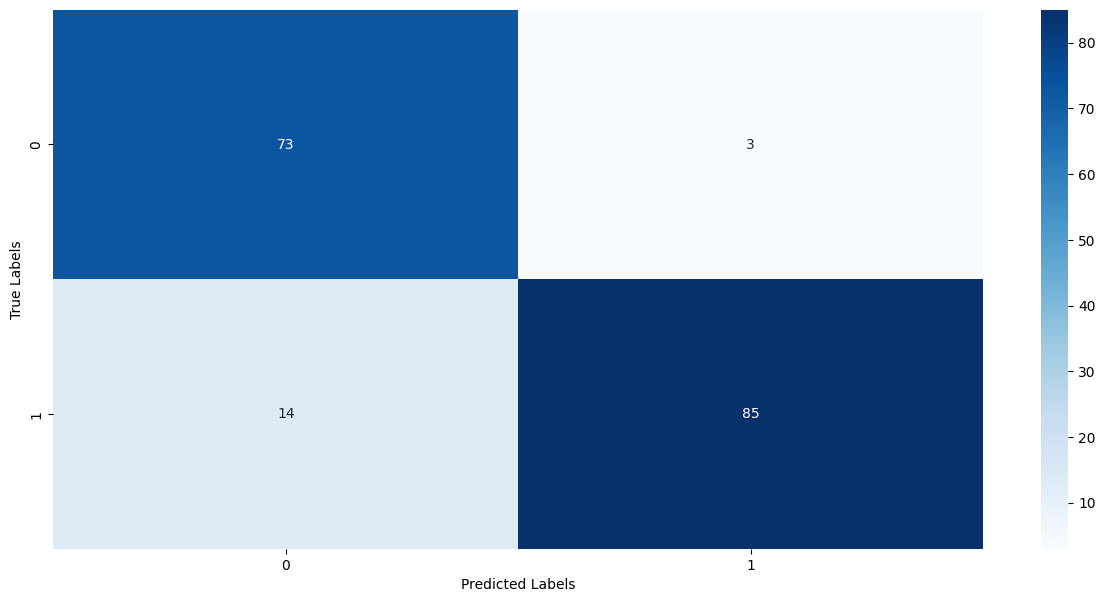

In [268]:
conf_mat = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')